In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
haberman=pd.read_csv('haberman.csv',names=['Age','Op_date','axil_nodes','Survsts'])
haberman.head()

,Age,Op_date,axil_nodes,Survsts
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


#### Number of Datapoints

In [3]:
print(haberman.shape)

(306, 4)


#### Columns

In [4]:
print(haberman.columns)

Index(['Age', 'Op_date', 'axil_nodes', 'Survsts'], dtype='object')


In [5]:
haberman['Survsts'].value_counts()


1    225
2     81
Name: Survsts, dtype: int64

In [6]:
haberman['Survsts'].value_counts()

1    225
2     81
Name: Survsts, dtype: int64

#### Note:

The survival status is represented in 1's and 2's which is a bit confusing. So i have taken "Survived" for those who survived above 5 years after surgery and "Dead" for those who did not, for convenience

In [7]:
haberman['Survsts'].replace({1:'Survived',2:'Dead'},inplace=True)

### 2D Scatter Plot 

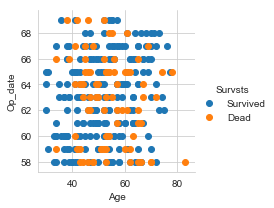

In [9]:
sns.set_style('whitegrid')
sns.FacetGrid(haberman, hue="Survsts", height=3) \
    .map(plt.scatter, 'Age', 'Op_date') \
    .add_legend()
plt.show()

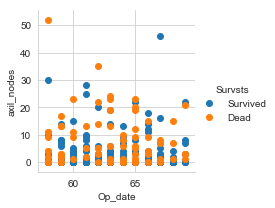

In [10]:
sns.set_style("whitegrid")
sns.FacetGrid(haberman, hue="Survsts",height=3).map(plt.scatter,'Op_date','axil_nodes').add_legend()
plt.show()

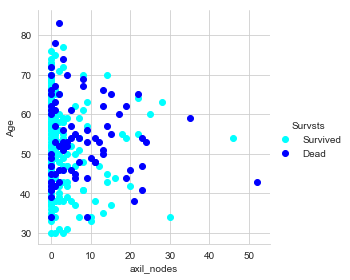

In [11]:
sns.set_style("whitegrid")
sns.FacetGrid(haberman,hue='Survsts',palette=['cyan','blue'],height=4).map(plt.scatter,'axil_nodes','Age').add_legend()
plt.show()

OBSERVATION:

From the above 3 Scatter plots, we cannot obtain any conclusions due to overlapping 

### Pair Plots

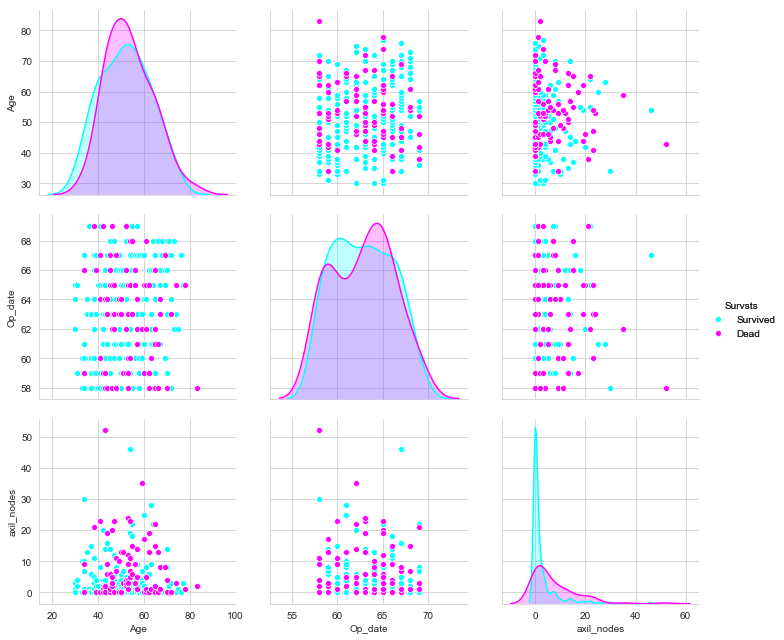

In [12]:
plt.close()
sns.set_style("whitegrid")
sns.pairplot(haberman,hue='Survsts',palette=['cyan','magenta'],height=3).add_legend()
plt.show()

In [13]:
type(haberman.columns)

pandas.core.indexes.base.Index

In [14]:
list(enumerate(haberman.columns))

[(0, 'Age'), (1, 'Op_date'), (2, 'axil_nodes'), (3, 'Survsts')]

### Histogram

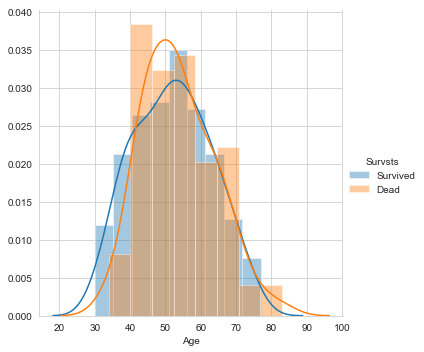

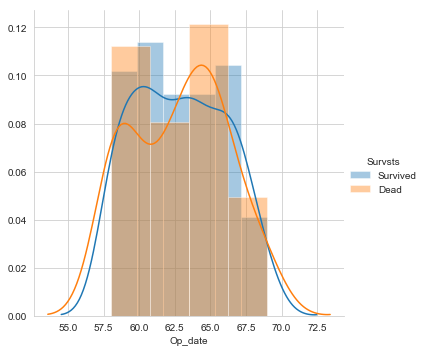

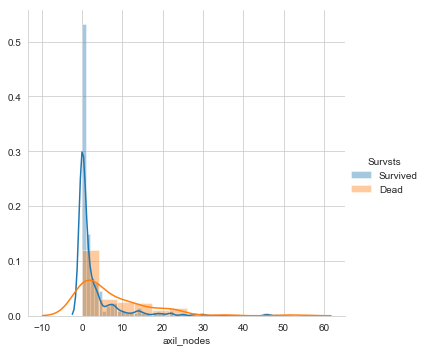

In [15]:
for index,feat in enumerate(list(haberman.columns)[:-1]):
    sns.set_style("whitegrid")
    sns.FacetGrid(haberman,hue='Survsts',height=5).map(sns.distplot,feat).add_legend()
    plt.plot()

OBSERVATION

1.From the above figures only axil_nodes figure is somewhat distinguishable

2.The density people survived is more in the range 0-3 axil nodes

### PDF , CDF

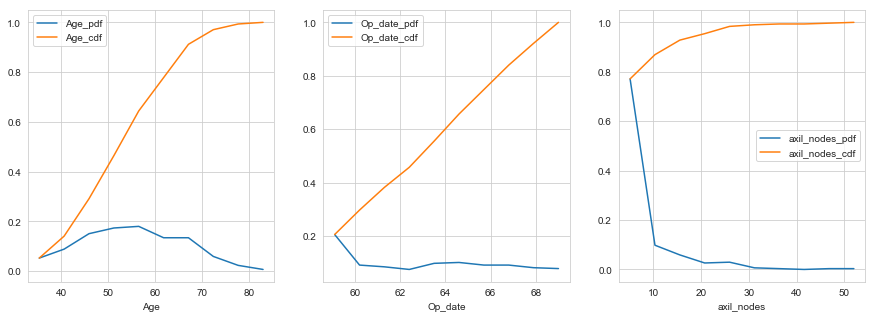

In [18]:
plt.figure(figsize=(15,5))
for index,feat in enumerate(list(haberman.columns)[:-1]):
    plt.subplot(1,3,index+1)
    counts,bin_edges=np.histogram(haberman[feat],bins=10)
    pdf = counts/(sum(counts))
  
    cdf = np.cumsum(pdf)
    plt.plot(bin_edges[1:],pdf);
    plt.plot(bin_edges[1:], cdf)
    plt.xlabel(feat)
    plt.legend([feat+'_pdf',feat+'_cdf'])
    

OBSERVATION:

1.Here almost 78% of the people have axil nodes less than 5 axil nodes. Other pdfs doesnt help much.

2.For more clarity,lets divide the people who survived 5 years or more after surgery and those who did not survive above 5 years

In [20]:
haberman_surv=haberman[haberman.Survsts=='Survived']
haberman_dead=haberman[haberman.Survsts=='Dead']

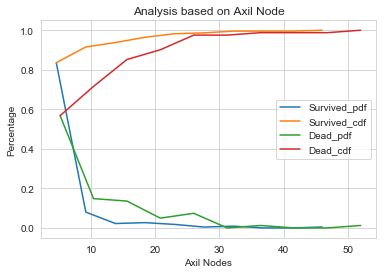

In [22]:
counts,bin_edges=np.histogram(haberman_surv['axil_nodes'],bins=10)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

counts,bin_edges=np.histogram(haberman_dead['axil_nodes'],bins=10)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.legend(['Survived_pdf','Survived_cdf','Dead_pdf','Dead_cdf'])
plt.xlabel("Axil Nodes")
plt.ylabel("Percentage")
plt.title('Analysis based on Axil Node')
plt.show()


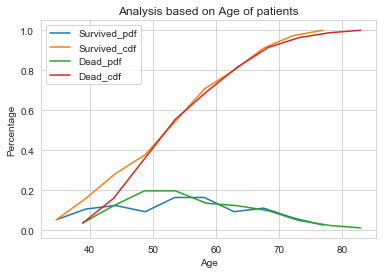

In [23]:
counts,bin_edges=np.histogram(haberman_surv['Age'],bins=10)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

counts,bin_edges=np.histogram(haberman_dead['Age'],bins=10)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.legend(['Survived_pdf','Survived_cdf','Dead_pdf','Dead_cdf'])
plt.xlabel("Age")
plt.ylabel("Percentage")
plt.title('Analysis based on Age of patients')
plt.show()

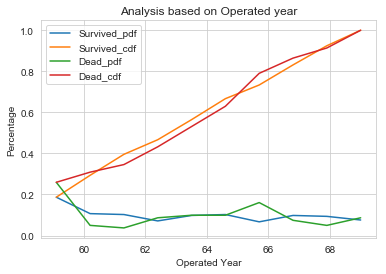

In [24]:
counts,bin_edges=np.histogram(haberman_surv['Op_date'],bins=10)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

counts,bin_edges=np.histogram(haberman_dead['Op_date'],bins=10)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.legend(['Survived_pdf','Survived_cdf','Dead_pdf','Dead_cdf'])
plt.xlabel("Operated Year")
plt.ylabel("Percentage")
plt.title('Analysis based on Operated year')
plt.show()

OBSERVATIONS:

1.83% of the people survived has less than 5 axil nodes which means only 17% of people survived has more than 5 axil nodes. Similarly, 42-44% of the people dead has more than 5 axil nodes. People having above 46 nodes obviously died.

2.People less than 38 years survived. People with cancer symptoms lived maximum upto 77 years.

### Box Plot

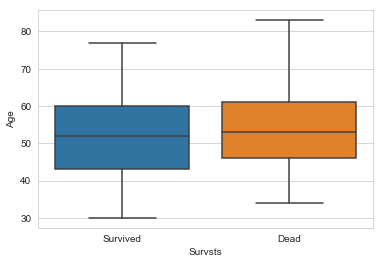

In [25]:
sns.boxplot(x='Survsts',y='Age',data=haberman)
plt.show()

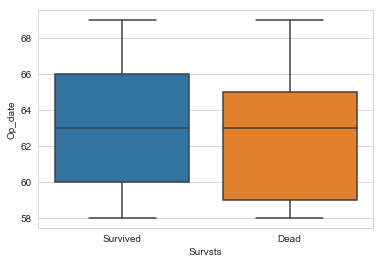

In [26]:
sns.boxplot(x='Survsts',y='Op_date',data=haberman)
plt.show()

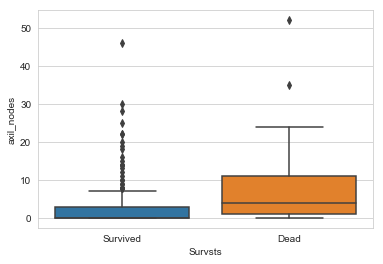

In [183]:
sns.boxplot(x='Survsts',y='axil_nodes',data=haberman)
plt.show()

### Violin Plot

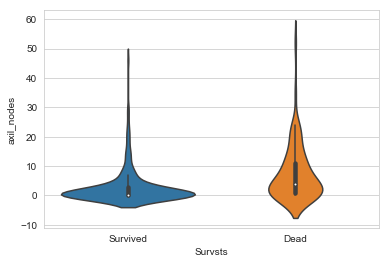

In [184]:
sns.violinplot(x='Survsts',y='axil_nodes',data=haberman,size=5)
plt.show()

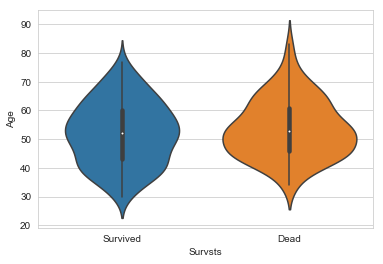

In [29]:
sns.violinplot(x='Survsts',y='Age',data=haberman,size=5)
plt.show()

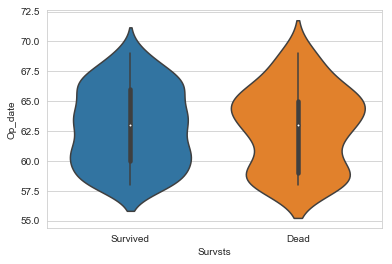

In [28]:
sns.violinplot(x='Survsts',y='Op_date',data=haberman,size=5)
plt.show()

### Observations

1.50th percentile of survivors have 0 nodes, 75th percentie of survivors have less than 3 axil nodes

2.25th percentile of dead have 1 axil node, 50th percentile of dead have axil nodes below 4,75th percentile of dead have axil nodes below 11.

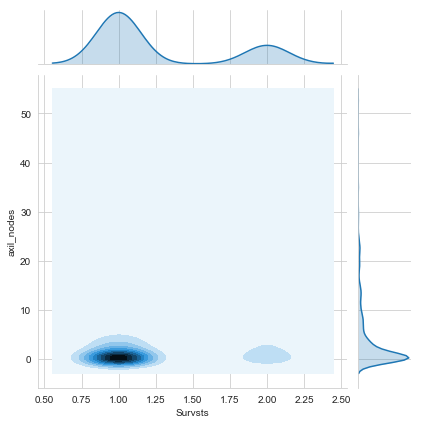

In [48]:
sns.jointplot(x="Survsts", y="axil_nodes", data=haberman, kind="kde");
plt.show();

### CONCLUSION

1.From the 3 Scatter plots, we cannot obtain any conclusions due to overlapping

2.From the Histogram, only axil_nodes figure is somewhat distinguishable

3.And, the density people survived is more in the range 0-3 axil nodes

4.From pdfs,cdfs 83% of the people survived has less than 5 axil nodes which means only 17% of people survived has more than 5 axil nodes. Similarly, 42-44% of the people dead has more than 5 axil nodes. People having above 46 nodes obviously died.

5.People less than 38 years survived. People with cancer symptoms lived maximum upto 77 years.

6.From boxplots, 50th percentile of survivors have 0 nodes, 75th percentie of survivors have less than 3 axil nodes & 25th percentile of dead have 1 axil node, 50th percentile of dead have axil nodes below 4,75th percentile of dead have axil nodes below 11.

7.Finally we get only one conclusion :if number of axillary node is less,than survival of patients is more. We need more features to comes on very good conlusion